***This notebook demonstrates the use of ExoCTK's `platon_wrapper` module.  As indicated by its name, this module is a wrapper around the `platon.retreiver.run_multinest` method, which runs nested sampling to retrieve atmospheric parameters.  For further information about `platon`, see the [project documentation](https://platon.readthedocs.io/en/latest/), the [API docs for the `retriever` module](https://platon.readthedocs.io/en/latest/source/platon.html#module-platon.retriever), or the [GitHub repository](https://github.com/ideasrule/platon).***

**Note that the example provided below is a minimal, bare-bones example that is meant to show how users may use the software and not take much computation time.  The parameters used and the corresponding results are not indicitive of a true scientific use case.  For a more comprehensive and robust use case, see the `platon_example.py` module in the `exoctk.atmospheric_retrievals` subpackage.**

In [1]:
# Required imports
import numpy as np
from platon.constants import R_sun, R_jup, M_jup
from exoctk.atmospheric_retrievals.platon_wrapper import PlatonWrapper

Failed to import gnumpy; not using GPU


***The `PlatonWrapper` object requires the user to supply a dictionary containing initial guesses of parameters that they wish to fit.  Note that `Rs`, `Mp`, `Rp`, and `T` must be supplied, while the others are optional.***

***Note that `Rs` are in units of solar radii, `Mp` are in units of Jupiter masses, and `Rp` is is units of Jupiter radii.***

In [2]:
params = {
    'Rs': 1.19,  # Required
    'Mp': 0.73,  # Required
    'Rp': 1.4,  # Required
    'T': 1200,  # Required
    'logZ': 0,  # Optional
    'CO_ratio': 0.53,  # Optional
    'log_cloudtop_P': 4,  # Optional
    'log_scatt_factor': 0,  # Optional
    'scatt_slope': 4,  # Optional
    'error_multiple': 1,  # Optional
    'T_star': 6091}  # Optional

***In order to perform the retrieval, users must instantiate a `PlatonWrapper` object and set the parameters***

In [3]:
pw = PlatonWrapper()
pw.set_parameters(params)

***Users may add additional fitting constraints via the `fit_info` attribute.  Note that this is optional.***

In [4]:
R_guess = 1.4 * R_jup
T_guess = 1200
pw.fit_info.add_gaussian_fit_param('Rs', 0.02*R_sun)
pw.fit_info.add_gaussian_fit_param('Mp', 0.04*M_jup)
pw.fit_info.add_uniform_fit_param('Rp', 0.9*R_guess, 1.1*R_guess)
pw.fit_info.add_uniform_fit_param('T', 0.5*T_guess, 1.5*T_guess)
pw.fit_info.add_uniform_fit_param("log_scatt_factor", 0, 1)
pw.fit_info.add_uniform_fit_param("logZ", -1, 3)
pw.fit_info.add_uniform_fit_param("log_cloudtop_P", -0.99, 5)
pw.fit_info.add_uniform_fit_param("error_multiple", 0.5, 5)

***Prior to performing the retrieval, users must define `wavelengths`, `bins`, `depths`, and `errors` attributes, each of which are 1-Dimentional `numpy` arrays.***

In [5]:
pw.wavelengths = 1e-6*np.array([1.119, 1.1387])
pw.bins = [[w-0.0095e-6, w+0.0095e-6] for w in pw.wavelengths]
pw.depths = 1e-6 * np.array([14512.7, 14546.5])
pw.errors = 1e-6 * np.array([50.6, 35.5])

***With everything defined, users can now perform the retreival***

Iteration 1: ln_prob=-7.57e+02	Rs=1.21 R_sun	Mp=0.73 M_jup	Rp=1.49 R_jup	T=1420 K	log_scatt_factor=0.52 	logZ=0.66 	log_cloudtop_P=4.13 	error_multiple=2.40 	
Iteration 2: ln_prob=-2.03e+02	Rs=1.20 R_sun	Mp=0.68 M_jup	Rp=1.45 R_jup	T=1515 K	log_scatt_factor=0.00 	logZ=2.83 	log_cloudtop_P=3.75 	error_multiple=2.80 	
Iteration 3: ln_prob=-8.72e+01	Rs=1.21 R_sun	Mp=0.69 M_jup	Rp=1.35 R_jup	T=1286 K	log_scatt_factor=0.52 	logZ=2.38 	log_cloudtop_P=3.66 	error_multiple=4.10 	
Iteration 4: ln_prob=-7.66e+02	Rs=1.17 R_sun	Mp=0.77 M_jup	Rp=1.44 R_jup	T=1663 K	log_scatt_factor=0.07 	logZ=0.11 	log_cloudtop_P=0.59 	error_multiple=3.44 	
Iteration 5: ln_prob=-3.01e+02	Rs=1.21 R_sun	Mp=0.71 M_jup	Rp=1.32 R_jup	T=1225 K	log_scatt_factor=0.92 	logZ=1.21 	log_cloudtop_P=0.40 	error_multiple=1.39 	
Iteration 6: ln_prob=-1.49e+02	Rs=1.20 R_sun	Mp=0.75 M_jup	Rp=1.40 R_jup	T=1319 K	log_scatt_factor=0.15 	logZ=0.17 	log_cloudtop_P=3.68 	error_multiple=1.58 	
Iteration 7: ln_prob=-4.50e+02	Rs=1.17 R_sun	M

Iteration 67: ln_prob=-7.60e+01	Rs=1.17 R_sun	Mp=0.73 M_jup	Rp=1.37 R_jup	T=1233 K	log_scatt_factor=0.47 	logZ=2.22 	log_cloudtop_P=1.11 	error_multiple=2.89 	
Iteration 68: ln_prob=-2.60e+02	Rs=1.22 R_sun	Mp=0.77 M_jup	Rp=1.52 R_jup	T=1092 K	log_scatt_factor=0.40 	logZ=1.64 	log_cloudtop_P=3.30 	error_multiple=4.73 	
Iteration 69: ln_prob=-1.50e+02	Rs=1.18 R_sun	Mp=0.66 M_jup	Rp=1.44 R_jup	T= 751 K	log_scatt_factor=0.39 	logZ=-0.75 	log_cloudtop_P=1.78 	error_multiple=4.89 	
Iteration 70: ln_prob=-1.20e+02	Rs=1.16 R_sun	Mp=0.77 M_jup	Rp=1.27 R_jup	T=1510 K	log_scatt_factor=0.33 	logZ=-0.76 	log_cloudtop_P=0.55 	error_multiple=1.51 	
Iteration 71: ln_prob=-7.51e+01	Rs=1.18 R_sun	Mp=0.77 M_jup	Rp=1.32 R_jup	T=1443 K	log_scatt_factor=0.62 	logZ=0.00 	log_cloudtop_P=2.20 	error_multiple=1.79 	
Iteration 72: ln_prob=-1.25e+02	Rs=1.20 R_sun	Mp=0.70 M_jup	Rp=1.28 R_jup	T=1372 K	log_scatt_factor=0.70 	logZ=0.16 	log_cloudtop_P=0.33 	error_multiple=3.00 	
Iteration 73: ln_prob=-7.62e+01	Rs=1.1

Iteration 123: ln_prob=-6.63e+01	Rs=1.20 R_sun	Mp=0.68 M_jup	Rp=1.37 R_jup	T= 868 K	log_scatt_factor=0.50 	logZ=-0.21 	log_cloudtop_P=3.67 	error_multiple=3.43 	
Iteration 124: ln_prob=-6.54e+01	Rs=1.20 R_sun	Mp=0.73 M_jup	Rp=1.39 R_jup	T=1141 K	log_scatt_factor=0.14 	logZ=0.23 	log_cloudtop_P=2.33 	error_multiple=4.40 	
Iteration 125: ln_prob=-6.69e+01	Rs=1.20 R_sun	Mp=0.72 M_jup	Rp=1.41 R_jup	T=1060 K	log_scatt_factor=0.76 	logZ=2.26 	log_cloudtop_P=1.86 	error_multiple=4.62 	
Iteration 126: ln_prob=-1.03e+02	Rs=1.19 R_sun	Mp=0.77 M_jup	Rp=1.31 R_jup	T=1254 K	log_scatt_factor=0.75 	logZ=1.56 	log_cloudtop_P=3.81 	error_multiple=4.04 	
Iteration 127: ln_prob=-6.28e+01	Rs=1.19 R_sun	Mp=0.75 M_jup	Rp=1.37 R_jup	T=1359 K	log_scatt_factor=0.77 	logZ=2.60 	log_cloudtop_P=3.52 	error_multiple=4.78 	
Iteration 128: ln_prob=-6.81e+01	Rs=1.18 R_sun	Mp=0.72 M_jup	Rp=1.36 R_jup	T= 651 K	log_scatt_factor=0.35 	logZ=0.91 	log_cloudtop_P=0.93 	error_multiple=3.12 	
Iteration 129: ln_prob=-1.01e+02	

Iteration 186: ln_prob=-6.43e+01	Rs=1.21 R_sun	Mp=0.78 M_jup	Rp=1.41 R_jup	T= 724 K	log_scatt_factor=0.47 	logZ=-0.88 	log_cloudtop_P=3.97 	error_multiple=3.95 	
Iteration 187: ln_prob=-7.70e+01	Rs=1.21 R_sun	Mp=0.68 M_jup	Rp=1.35 R_jup	T=1016 K	log_scatt_factor=0.81 	logZ=-0.06 	log_cloudtop_P=2.60 	error_multiple=4.59 	
Iteration 188: ln_prob=-6.69e+01	Rs=1.17 R_sun	Mp=0.73 M_jup	Rp=1.36 R_jup	T=1307 K	log_scatt_factor=0.66 	logZ=0.14 	log_cloudtop_P=3.09 	error_multiple=3.63 	
Iteration 189: ln_prob=-6.33e+01	Rs=1.18 R_sun	Mp=0.70 M_jup	Rp=1.32 R_jup	T=1037 K	log_scatt_factor=0.04 	logZ=0.75 	log_cloudtop_P=-0.98 	error_multiple=4.45 	
Iteration 190: ln_prob=-6.33e+01	Rs=1.21 R_sun	Mp=0.73 M_jup	Rp=1.39 R_jup	T=1518 K	log_scatt_factor=0.68 	logZ=2.32 	log_cloudtop_P=4.98 	error_multiple=4.15 	
Iteration 191: ln_prob=-6.65e+01	Rs=1.20 R_sun	Mp=0.75 M_jup	Rp=1.32 R_jup	T=1096 K	log_scatt_factor=0.54 	logZ=-0.35 	log_cloudtop_P=-0.67 	error_multiple=2.78 	
Iteration 192: ln_prob=-7.26e

Iteration 243: ln_prob=-6.26e+01	Rs=1.16 R_sun	Mp=0.75 M_jup	Rp=1.33 R_jup	T=1365 K	log_scatt_factor=0.40 	logZ=2.08 	log_cloudtop_P=2.19 	error_multiple=2.50 	
Iteration 244: ln_prob=-6.35e+01	Rs=1.20 R_sun	Mp=0.72 M_jup	Rp=1.38 R_jup	T= 628 K	log_scatt_factor=0.03 	logZ=0.21 	log_cloudtop_P=3.46 	error_multiple=4.18 	
Iteration 245: ln_prob=-6.60e+01	Rs=1.20 R_sun	Mp=0.78 M_jup	Rp=1.36 R_jup	T= 910 K	log_scatt_factor=0.32 	logZ=-0.34 	log_cloudtop_P=1.26 	error_multiple=0.65 	
Iteration 246: ln_prob=-6.62e+01	Rs=1.18 R_sun	Mp=0.77 M_jup	Rp=1.39 R_jup	T= 661 K	log_scatt_factor=0.99 	logZ=2.32 	log_cloudtop_P=2.85 	error_multiple=3.09 	
Iteration 247: ln_prob=-6.41e+01	Rs=1.20 R_sun	Mp=0.72 M_jup	Rp=1.37 R_jup	T=1249 K	log_scatt_factor=0.75 	logZ=-0.02 	log_cloudtop_P=2.13 	error_multiple=2.17 	
Iteration 248: ln_prob=-6.43e+01	Rs=1.21 R_sun	Mp=0.72 M_jup	Rp=1.37 R_jup	T=1206 K	log_scatt_factor=0.84 	logZ=-0.15 	log_cloudtop_P=1.14 	error_multiple=4.21 	
Iteration 249: ln_prob=-6.29e+0

Iteration 296: ln_prob=-6.31e+01	Rs=1.21 R_sun	Mp=0.74 M_jup	Rp=1.40 R_jup	T=1432 K	log_scatt_factor=0.84 	logZ=2.68 	log_cloudtop_P=2.02 	error_multiple=3.28 	
Iteration 297: ln_prob=-6.48e+01	Rs=1.16 R_sun	Mp=0.68 M_jup	Rp=1.32 R_jup	T=1452 K	log_scatt_factor=0.87 	logZ=-0.49 	log_cloudtop_P=3.45 	error_multiple=4.40 	
Iteration 298: ln_prob=-6.32e+01	Rs=1.19 R_sun	Mp=0.69 M_jup	Rp=1.35 R_jup	T= 992 K	log_scatt_factor=0.42 	logZ=2.01 	log_cloudtop_P=0.27 	error_multiple=3.65 	
Iteration 299: ln_prob=-6.04e+01	Rs=1.19 R_sun	Mp=0.72 M_jup	Rp=1.36 R_jup	T= 901 K	log_scatt_factor=0.52 	logZ=-0.19 	log_cloudtop_P=2.15 	error_multiple=1.44 	
Iteration 300: ln_prob=-6.33e+01	Rs=1.19 R_sun	Mp=0.75 M_jup	Rp=1.36 R_jup	T=1021 K	log_scatt_factor=0.68 	logZ=1.68 	log_cloudtop_P=1.45 	error_multiple=4.99 	
Iteration 301: ln_prob=-6.71e+01	Rs=1.18 R_sun	Mp=0.84 M_jup	Rp=1.36 R_jup	T=1694 K	log_scatt_factor=0.50 	logZ=2.78 	log_cloudtop_P=1.44 	error_multiple=4.32 	
Iteration 302: ln_prob=-6.32e+01

Iteration 350: ln_prob=-6.15e+01	Rs=1.19 R_sun	Mp=0.75 M_jup	Rp=1.31 R_jup	T=1285 K	log_scatt_factor=0.50 	logZ=1.25 	log_cloudtop_P=-0.99 	error_multiple=2.38 	
Iteration 351: ln_prob=-6.26e+01	Rs=1.18 R_sun	Mp=0.71 M_jup	Rp=1.38 R_jup	T= 893 K	log_scatt_factor=0.28 	logZ=2.66 	log_cloudtop_P=2.27 	error_multiple=1.96 	
Iteration 352: ln_prob=-6.24e+01	Rs=1.20 R_sun	Mp=0.74 M_jup	Rp=1.38 R_jup	T= 829 K	log_scatt_factor=0.48 	logZ=1.68 	log_cloudtop_P=3.00 	error_multiple=3.83 	
Iteration 353: ln_prob=-6.26e+01	Rs=1.18 R_sun	Mp=0.74 M_jup	Rp=1.36 R_jup	T=1160 K	log_scatt_factor=0.59 	logZ=0.30 	log_cloudtop_P=4.63 	error_multiple=3.86 	
Iteration 354: ln_prob=-6.56e+01	Rs=1.23 R_sun	Mp=0.80 M_jup	Rp=1.43 R_jup	T= 732 K	log_scatt_factor=0.71 	logZ=2.93 	log_cloudtop_P=2.98 	error_multiple=2.54 	
Iteration 355: ln_prob=-6.33e+01	Rs=1.20 R_sun	Mp=0.69 M_jup	Rp=1.36 R_jup	T=1070 K	log_scatt_factor=0.19 	logZ=-0.44 	log_cloudtop_P=1.84 	error_multiple=3.15 	
Iteration 356: ln_prob=-6.18e+01

Iteration 402: ln_prob=-6.00e+01	Rs=1.20 R_sun	Mp=0.74 M_jup	Rp=1.36 R_jup	T= 741 K	log_scatt_factor=0.79 	logZ=0.55 	log_cloudtop_P=-0.64 	error_multiple=0.97 	
Iteration 403: ln_prob=-6.32e+01	Rs=1.22 R_sun	Mp=0.75 M_jup	Rp=1.37 R_jup	T= 874 K	log_scatt_factor=0.32 	logZ=-0.67 	log_cloudtop_P=0.01 	error_multiple=3.62 	
Iteration 404: ln_prob=-6.04e+01	Rs=1.20 R_sun	Mp=0.72 M_jup	Rp=1.37 R_jup	T=1429 K	log_scatt_factor=0.31 	logZ=2.13 	log_cloudtop_P=0.55 	error_multiple=1.38 	
Iteration 405: ln_prob=-6.39e+01	Rs=1.19 R_sun	Mp=0.64 M_jup	Rp=1.31 R_jup	T=1652 K	log_scatt_factor=0.77 	logZ=0.89 	log_cloudtop_P=0.87 	error_multiple=1.97 	
Iteration 406: ln_prob=-6.22e+01	Rs=1.17 R_sun	Mp=0.71 M_jup	Rp=1.35 R_jup	T=1174 K	log_scatt_factor=0.17 	logZ=2.40 	log_cloudtop_P=2.22 	error_multiple=2.24 	
Iteration 407: ln_prob=-6.03e+01	Rs=1.21 R_sun	Mp=0.74 M_jup	Rp=1.38 R_jup	T= 969 K	log_scatt_factor=0.05 	logZ=1.07 	log_cloudtop_P=3.73 	error_multiple=0.75 	
Iteration 408: ln_prob=-6.30e+01

Iteration 454: ln_prob=-6.29e+01	Rs=1.20 R_sun	Mp=0.79 M_jup	Rp=1.35 R_jup	T=1565 K	log_scatt_factor=0.86 	logZ=1.55 	log_cloudtop_P=1.39 	error_multiple=2.18 	
Iteration 455: ln_prob=-6.21e+01	Rs=1.20 R_sun	Mp=0.70 M_jup	Rp=1.34 R_jup	T=1616 K	log_scatt_factor=0.47 	logZ=0.99 	log_cloudtop_P=1.44 	error_multiple=2.75 	
Iteration 456: ln_prob=-6.37e+01	Rs=1.21 R_sun	Mp=0.80 M_jup	Rp=1.36 R_jup	T=1628 K	log_scatt_factor=0.94 	logZ=1.64 	log_cloudtop_P=1.28 	error_multiple=1.50 	
Iteration 457: ln_prob=-6.02e+01	Rs=1.20 R_sun	Mp=0.68 M_jup	Rp=1.31 R_jup	T=1554 K	log_scatt_factor=0.63 	logZ=0.10 	log_cloudtop_P=-0.10 	error_multiple=0.62 	
Iteration 458: ln_prob=-6.04e+01	Rs=1.19 R_sun	Mp=0.75 M_jup	Rp=1.38 R_jup	T=1281 K	log_scatt_factor=0.14 	logZ=2.49 	log_cloudtop_P=0.44 	error_multiple=1.32 	
Iteration 459: ln_prob=-6.27e+01	Rs=1.17 R_sun	Mp=0.79 M_jup	Rp=1.36 R_jup	T= 864 K	log_scatt_factor=0.83 	logZ=-0.59 	log_cloudtop_P=4.63 	error_multiple=1.59 	
Iteration 460: ln_prob=-6.20e+01

Iteration 507: ln_prob=-6.23e+01	Rs=1.19 R_sun	Mp=0.80 M_jup	Rp=1.36 R_jup	T=1011 K	log_scatt_factor=0.35 	logZ=1.74 	log_cloudtop_P=-0.64 	error_multiple=1.35 	
Iteration 508: ln_prob=-6.26e+01	Rs=1.19 R_sun	Mp=0.66 M_jup	Rp=1.39 R_jup	T= 866 K	log_scatt_factor=0.65 	logZ=2.58 	log_cloudtop_P=3.29 	error_multiple=1.31 	
Iteration 509: ln_prob=-6.38e+01	Rs=1.22 R_sun	Mp=0.80 M_jup	Rp=1.35 R_jup	T=1382 K	log_scatt_factor=0.29 	logZ=-0.41 	log_cloudtop_P=-0.17 	error_multiple=2.20 	
Iteration 510: ln_prob=-6.04e+01	Rs=1.18 R_sun	Mp=0.70 M_jup	Rp=1.38 R_jup	T=1037 K	log_scatt_factor=0.44 	logZ=2.88 	log_cloudtop_P=2.83 	error_multiple=1.23 	
Iteration 511: ln_prob=-5.97e+01	Rs=1.19 R_sun	Mp=0.69 M_jup	Rp=1.30 R_jup	T=1734 K	log_scatt_factor=0.74 	logZ=-0.30 	log_cloudtop_P=0.39 	error_multiple=0.72 	
Iteration 512: ln_prob=-6.08e+01	Rs=1.20 R_sun	Mp=0.69 M_jup	Rp=1.33 R_jup	T=1740 K	log_scatt_factor=0.22 	logZ=1.07 	log_cloudtop_P=1.36 	error_multiple=1.22 	
Iteration 513: ln_prob=-6.16e+

Iteration 562: ln_prob=-6.24e+01	Rs=1.19 R_sun	Mp=0.81 M_jup	Rp=1.38 R_jup	T=1157 K	log_scatt_factor=0.68 	logZ=2.73 	log_cloudtop_P=2.32 	error_multiple=1.07 	
Iteration 563: ln_prob=-6.17e+01	Rs=1.21 R_sun	Mp=0.70 M_jup	Rp=1.38 R_jup	T=1200 K	log_scatt_factor=0.81 	logZ=0.95 	log_cloudtop_P=2.17 	error_multiple=1.17 	
Iteration 564: ln_prob=-6.06e+01	Rs=1.18 R_sun	Mp=0.71 M_jup	Rp=1.36 R_jup	T= 898 K	log_scatt_factor=0.60 	logZ=-0.40 	log_cloudtop_P=4.85 	error_multiple=1.05 	
Iteration 565: ln_prob=-6.31e+01	Rs=1.23 R_sun	Mp=0.78 M_jup	Rp=1.42 R_jup	T= 880 K	log_scatt_factor=0.45 	logZ=-0.36 	log_cloudtop_P=3.37 	error_multiple=1.49 	
Iteration 566: ln_prob=-5.93e+01	Rs=1.20 R_sun	Mp=0.73 M_jup	Rp=1.32 R_jup	T=1605 K	log_scatt_factor=0.30 	logZ=1.54 	log_cloudtop_P=-0.43 	error_multiple=0.65 	
Iteration 567: ln_prob=-6.05e+01	Rs=1.19 R_sun	Mp=0.71 M_jup	Rp=1.39 R_jup	T= 973 K	log_scatt_factor=0.29 	logZ=2.79 	log_cloudtop_P=2.90 	error_multiple=1.39 	
Iteration 568: ln_prob=-6.12e+0

Iteration 613: ln_prob=-6.05e+01	Rs=1.17 R_sun	Mp=0.71 M_jup	Rp=1.34 R_jup	T=1181 K	log_scatt_factor=0.41 	logZ=1.92 	log_cloudtop_P=0.97 	error_multiple=1.13 	
Iteration 614: ln_prob=-6.06e+01	Rs=1.20 R_sun	Mp=0.73 M_jup	Rp=1.36 R_jup	T= 974 K	log_scatt_factor=0.53 	logZ=-0.79 	log_cloudtop_P=0.41 	error_multiple=1.43 	
Iteration 615: ln_prob=-6.06e+01	Rs=1.18 R_sun	Mp=0.74 M_jup	Rp=1.38 R_jup	T= 880 K	log_scatt_factor=0.32 	logZ=2.91 	log_cloudtop_P=1.25 	error_multiple=0.68 	
Iteration 616: ln_prob=-6.12e+01	Rs=1.21 R_sun	Mp=0.78 M_jup	Rp=1.40 R_jup	T=1270 K	log_scatt_factor=0.20 	logZ=2.49 	log_cloudtop_P=1.46 	error_multiple=1.27 	
Iteration 617: ln_prob=-6.02e+01	Rs=1.19 R_sun	Mp=0.69 M_jup	Rp=1.32 R_jup	T=1427 K	log_scatt_factor=0.79 	logZ=-0.62 	log_cloudtop_P=1.22 	error_multiple=0.83 	
Iteration 618: ln_prob=-6.18e+01	Rs=1.20 R_sun	Mp=0.82 M_jup	Rp=1.38 R_jup	T=1198 K	log_scatt_factor=0.49 	logZ=2.17 	log_cloudtop_P=2.17 	error_multiple=0.61 	
Iteration 619: ln_prob=-6.05e+01

Iteration 664: ln_prob=-6.08e+01	Rs=1.17 R_sun	Mp=0.74 M_jup	Rp=1.33 R_jup	T= 702 K	log_scatt_factor=0.05 	logZ=1.31 	log_cloudtop_P=0.33 	error_multiple=1.15 	
Iteration 665: ln_prob=-6.03e+01	Rs=1.19 R_sun	Mp=0.70 M_jup	Rp=1.36 R_jup	T=1228 K	log_scatt_factor=0.71 	logZ=1.78 	log_cloudtop_P=1.12 	error_multiple=1.11 	
Iteration 666: ln_prob=-6.15e+01	Rs=1.21 R_sun	Mp=0.66 M_jup	Rp=1.33 R_jup	T=1494 K	log_scatt_factor=0.42 	logZ=0.38 	log_cloudtop_P=0.46 	error_multiple=0.78 	
Iteration 667: ln_prob=-6.00e+01	Rs=1.21 R_sun	Mp=0.74 M_jup	Rp=1.41 R_jup	T=1206 K	log_scatt_factor=0.78 	logZ=2.82 	log_cloudtop_P=1.00 	error_multiple=0.90 	
Iteration 668: ln_prob=-6.03e+01	Rs=1.21 R_sun	Mp=0.69 M_jup	Rp=1.38 R_jup	T= 734 K	log_scatt_factor=0.65 	logZ=0.08 	log_cloudtop_P=0.86 	error_multiple=0.88 	
#Parameter Lower_error Median Upper_error Best_fit
Max_lnprob -59.14701863495125
Rs 13368562.054356575 828307180.1901911 12838344.654518008 822242637.2725482
Mp 7.380605637890293e+25 1.3773080534

/Users/bourque/anaconda2/envs/exoctk-3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Results file saved to results.dat


RuntimeError: latex was not able to process the following string:
b'log_scatt_factor'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.15 (TeX Live 2014/Fink) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/bourque/.matplotlib/tex.cache/c8559a5056a0b4296236c8a2a8efa560.tex
LaTeX2e <2014/05/01>
Babel <3.9k> and hyphenation patterns for 78 languages loaded.
(/sw/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/sw/share/texmf-dist/tex/latex/base/size10.clo))
(/sw/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/sw/share/texmf-dist/tex/latex/psnfss/helvet.sty
(/sw/share/texmf-dist/tex/latex/graphics/keyval.sty))
(/sw/share/texmf-dist/tex/latex/base/textcomp.sty
(/sw/share/texmf-dist/tex/latex/base/ts1enc.def))
(/sw/share/texmf-dist/tex/latex/base/inputenc.sty
(/sw/share/texmf-dist/tex/latex/base/utf8.def
(/sw/share/texmf-dist/tex/latex/base/t1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ot1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/omsenc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/sw/share/texmf-dist/tex/latex/geometry/geometry.sty
(/sw/share/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/sw/share/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/sw/share/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c8559a5056a0b4296236c8a2a8efa560.aux)
(/sw/share/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/sw/share/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily log_
                                                  scatt_factor}
No pages of output.
Transcript written on c8559a5056a0b4296236c8a2a8efa560.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0xb1ec8aae8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'log_scatt_factor'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.15 (TeX Live 2014/Fink) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/bourque/.matplotlib/tex.cache/c8559a5056a0b4296236c8a2a8efa560.tex
LaTeX2e <2014/05/01>
Babel <3.9k> and hyphenation patterns for 78 languages loaded.
(/sw/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/sw/share/texmf-dist/tex/latex/base/size10.clo))
(/sw/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/sw/share/texmf-dist/tex/latex/psnfss/helvet.sty
(/sw/share/texmf-dist/tex/latex/graphics/keyval.sty))
(/sw/share/texmf-dist/tex/latex/base/textcomp.sty
(/sw/share/texmf-dist/tex/latex/base/ts1enc.def))
(/sw/share/texmf-dist/tex/latex/base/inputenc.sty
(/sw/share/texmf-dist/tex/latex/base/utf8.def
(/sw/share/texmf-dist/tex/latex/base/t1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ot1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/omsenc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/sw/share/texmf-dist/tex/latex/geometry/geometry.sty
(/sw/share/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/sw/share/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/sw/share/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c8559a5056a0b4296236c8a2a8efa560.aux)
(/sw/share/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/sw/share/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily log_
                                                  scatt_factor}
No pages of output.
Transcript written on c8559a5056a0b4296236c8a2a8efa560.log.




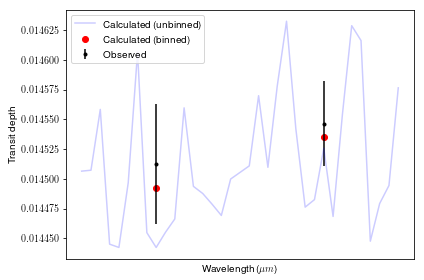

RuntimeError: latex was not able to process the following string:
b'log_scatt_factor'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.15 (TeX Live 2014/Fink) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/bourque/.matplotlib/tex.cache/c8559a5056a0b4296236c8a2a8efa560.tex
LaTeX2e <2014/05/01>
Babel <3.9k> and hyphenation patterns for 78 languages loaded.
(/sw/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/sw/share/texmf-dist/tex/latex/base/size10.clo))
(/sw/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/sw/share/texmf-dist/tex/latex/psnfss/helvet.sty
(/sw/share/texmf-dist/tex/latex/graphics/keyval.sty))
(/sw/share/texmf-dist/tex/latex/base/textcomp.sty
(/sw/share/texmf-dist/tex/latex/base/ts1enc.def))
(/sw/share/texmf-dist/tex/latex/base/inputenc.sty
(/sw/share/texmf-dist/tex/latex/base/utf8.def
(/sw/share/texmf-dist/tex/latex/base/t1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ot1enc.dfu)
(/sw/share/texmf-dist/tex/latex/base/omsenc.dfu)
(/sw/share/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/sw/share/texmf-dist/tex/latex/geometry/geometry.sty
(/sw/share/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/sw/share/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/sw/share/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c8559a5056a0b4296236c8a2a8efa560.aux)
(/sw/share/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/sw/share/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily log_
                                                  scatt_factor}
No pages of output.
Transcript written on c8559a5056a0b4296236c8a2a8efa560.log.




<Figure size 1303.2x1303.2 with 64 Axes>

In [6]:
pw.retrieve()

***Results are stored as a text file in the location given by the `output_results` attribute***

In [ ]:
# View the results
with open(pw.output_results, 'r') as f:
    results = f.readlines()
print(results)